# **Итоговая работа по дисциплине "Дополнительные главы теории вероятностей и математической статистики"**

Направление подготовки: 02.04.03 «Математическое обеспечение и администрирование информационных систем»

Выполнил: студент Щетинин Р.В.




# Coffee Quality Data (CQI May-2023)

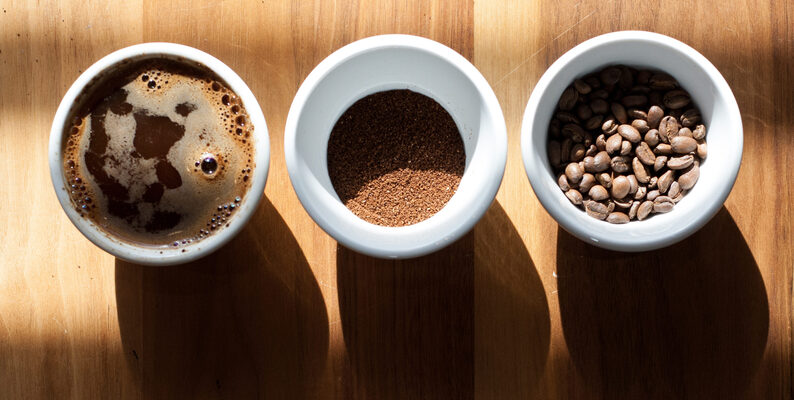



# О наборе данных
Институт качества кофе
Институт качества кофе (CQI) — это некоммерческая организация, которая работает над улучшением качества и ценности кофе во всем мире. Она была основана в 1996 году, ее штаб-квартира находится в Калифорнии, США.

Миссия CQI — продвигать качество кофе посредством ряда мероприятий, включающих программы исследований, обучения и сертификации. Организация работает с производителями кофе, переработчиками, обжарщиками и другими заинтересованными сторонами для улучшения стандартов качества кофе, содействия устойчивому развитию и поддержки развития индустрии спешиэлти кофе.

# Данные

Сенсорные оценки (оценки качества кофе).

Аромат: Относится к запаху или аромату кофе.

Вкус: Вкус кофе оценивается на основе вкуса, включая сладость, горечь, кислотность и другие вкусовые ноты.

Послевкусие: относится к стойкому привкусу, который остается во рту после проглатывания кофе.

Кислотность: Кислотность кофе означает яркость или живость вкуса.

Тело: Тело кофе относится к густоте или вязкости кофе во рту.

Баланс: Баланс означает, насколько хорошо различные вкусовые компоненты кофе взаимодействуют друг с другом.

Однородность: Однородность означает консистенцию кофе от чашки к чашке.

Чистая чашка: под чистой чашкой подразумевается кофе без каких-либо посторонних привкусов или дефектов, таких как кислинка, затхлость или затхлость.

Сладость: ее можно охарактеризовать как карамельную, фруктовую или цветочную, и это желательное качество кофе.

# **Импорт данных**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
import scipy.stats as stats

In [2]:
from google.colab import files
df = files.upload()


Saving df_arabica_clean.csv to df_arabica_clean.csv


In [3]:
df = pd.read_csv('df_arabica_clean.csv')

In [4]:
df=df.reset_index()
df

,index,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  207 non-null    int64  
 1   Unnamed: 0             207 non-null    int64  
 2   ID                     207 non-null    int64  
 3   Country of Origin      207 non-null    object 
 4   Farm Name              205 non-null    object 
 5   Lot Number             206 non-null    object 
 6   Mill                   204 non-null    object 
 7   ICO Number             75 non-null     object 
 8   Company                207 non-null    object 
 9   Altitude               206 non-null    object 
 10  Region                 205 non-null    object 
 11  Producer               206 non-null    object 
 12  Number of Bags         207 non-null    int64  
 13  Bag Weight             207 non-null    object 
 14  In-Country Partner     207 non-null    object 
 15  Harves

In [6]:
total_cup_points = df['Total Cup Points']
total_cup_points

0      89.33
1      87.58
2      87.42
3      87.17
4      87.08
       ...  
202    80.08
203    80.00
204    79.67
205    78.08
206    78.00
Name: Total Cup Points, Length: 207, dtype: float64

# **Подготовка датасета для анализа данных**

In [7]:
# Проверка пропущенных значений
missing_values = df.isnull()

# Проверка пропущенных значений в столбцах
missing_counts = missing_values.sum()

# Процент пропущенных значений в столбцах
missing_persentages = (missing_counts / len(df)) * 100

# Вывод информации о пропущенных значениях
missing_data = pd.DataFrame({'Missing count': missing_counts, 'Missing percentage': missing_persentages})
print(missing_data)

                       Missing count  Missing percentage
index                              0            0.000000
Unnamed: 0                         0            0.000000
ID                                 0            0.000000
Country of Origin                  0            0.000000
Farm Name                          2            0.966184
Lot Number                         1            0.483092
Mill                               3            1.449275
ICO Number                       132           63.768116
Company                            0            0.000000
Altitude                           1            0.483092
Region                             2            0.966184
Producer                           1            0.483092
Number of Bags                     0            0.000000
Bag Weight                         0            0.000000
In-Country Partner                 0            0.000000
Harvest Year                       0            0.000000
Grading Date                   

In [8]:
# Удаление лишних колонок
columns_to_drop = [
    'Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
    'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
    'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
    'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
    'Category One Defects', 'Quakers', 'Color', 'Category Two Defects',
    'Expiration', 'Certification Body', 'Certification Address',
    'Certification Contact', 'Defects', 'Clean Cup', 'Sweetness', 'index'
                  ]
df.drop(columns=columns_to_drop, inplace=True)
df

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage
0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,8.58,89.33,11.8
1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,8.50,87.58,10.5
2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,8.33,87.42,10.4
3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,8.25,87.17,11.8
4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,8.25,87.08,11.6
...,...,...,...,...,...,...,...,...,...,...
202,7.17,7.17,6.92,7.17,7.42,7.17,10.0,7.08,80.08,11.4
203,7.33,7.08,6.75,7.17,7.42,7.17,10.0,7.08,80.00,10.4
204,7.25,7.17,7.08,7.00,7.08,7.08,10.0,7.00,79.67,11.6
205,6.50,6.75,6.75,7.17,7.08,7.00,10.0,6.83,78.08,11.0


# **Построение матрицы корреляции**

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='Reds')

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage
Aroma,1.000000,0.822779,0.793397,0.712920,0.633101,0.745648,-0.028063,0.801765,0.868919,-0.002418
Flavor,0.822779,1.000000,0.876811,0.810934,0.739857,0.851786,-0.039767,0.877849,0.939124,-0.050902
Aftertaste,0.793397,0.876811,1.000000,0.814439,0.738674,0.861951,-0.023926,0.865612,0.934813,-0.051115
Acidity,0.712920,0.810934,0.814439,1.000000,0.765185,0.805236,-0.062564,0.840583,0.897057,-0.016751
Body,0.633101,0.739857,0.738674,0.765185,1.000000,0.816098,-0.043904,0.771607,0.847216,0.009771
Balance,0.745648,0.851786,0.861951,0.805236,0.816098,1.000000,-0.089064,0.884467,0.929520,-0.072660
Uniformity,-0.028063,-0.039767,-0.023926,-0.062564,-0.043904,-0.089064,1.000000,-0.074602,0.003556,0.035240
Overall,0.801765,0.877849,0.865612,0.840583,0.771607,0.884467,-0.074602,1.000000,0.947217,-0.113514
Total Cup Points,0.868919,0.939124,0.934813,0.897057,0.847216,0.929520,0.003556,0.947217,1.000000,-0.046476
Moisture Percentage,-0.002418,-0.050902,-0.051115,-0.016751,0.009771,-0.072660,0.035240,-0.113514,-0.046476,1.000000


Матрица корреляции отражает степень линейной связи между различными переменными. Значения корреляции варьируют от -1 до 1, где:

1 указывает на положительную линейную связь (при увеличении одной переменной, другая тоже увеличивается), -1 указывает на отрицательную линейную связь (при увеличении одной переменной, другая уменьшается), 0 указывает на отсутствие линейной связи. Рассмотрим конкретные значения в матрице:

**Aroma**

Сильная положительная связь с Flavor (вкусом), Aftertaste (послевкусием), Acidity, Balance, Overall и Total Cup Points. Аромат действительно важен для кофе и, конечно же, влияет на итоговую оценку (Overall и Total Cup Points). Почти полное отсутствие связи с Uniformity (однородность) и Moisture Percentage (процент влажности). Умеренная положительная связь с Body. Слабая отрицательная связь с Uniformity.

**Flavor**

Сильная положительная связь с Aroma, Aftertaste, Acidity (кислотность), Balance, Body, итоговыми оценками Overall и Total Cup Points. Вкус - один из самых важных параметров для кофе. Слабая отрицательная связь с Moisture Percentage (процент влажности).

**Aftertaste**

Сильная положительная связь с Aroma, Flavor, Acidity, Body, Balance, Overall и Total Cup Points. Слабая отрицательная связь с Moisture Percentage и Uniformity.

**Acidity**

Сильная положительная связь с Aroma, Flavor, Aftertaste, Body, Balance, Overall, Total Cup Points. Слабая отрицательная связь с Uniformity, Moisture Percentage.

**Body**

Умеренная положительная связь с Aroma. Сильная положительная с Flavor, Aftertaste, Acidity, Body, Balance, Overall, Total Cup Points. Слабая отрицательная связь с Uniformity, отсутствие связи с Moisture Percentage.

**Balance**

Сильная положительная связь с Aroma, Flavor, Aftertaste, Acidity, Body, Overall, Total Cup Points. Слабая отрицательная связь с Uniformity, Moisture Percentage.

**Uniformity**

Слабая отрицательная связь с Aroma,	Flavor,	Aftertaste,	Acidity,	Body, 	Balance, Overall. Слабая положительная связь с Moisture Percentage.

**Moisture Percentage**

Слабая отрицательная связь с Aftertaste, 	Acidity, Balance, Overall.
Слабая положительная связь с Moisture Percentage






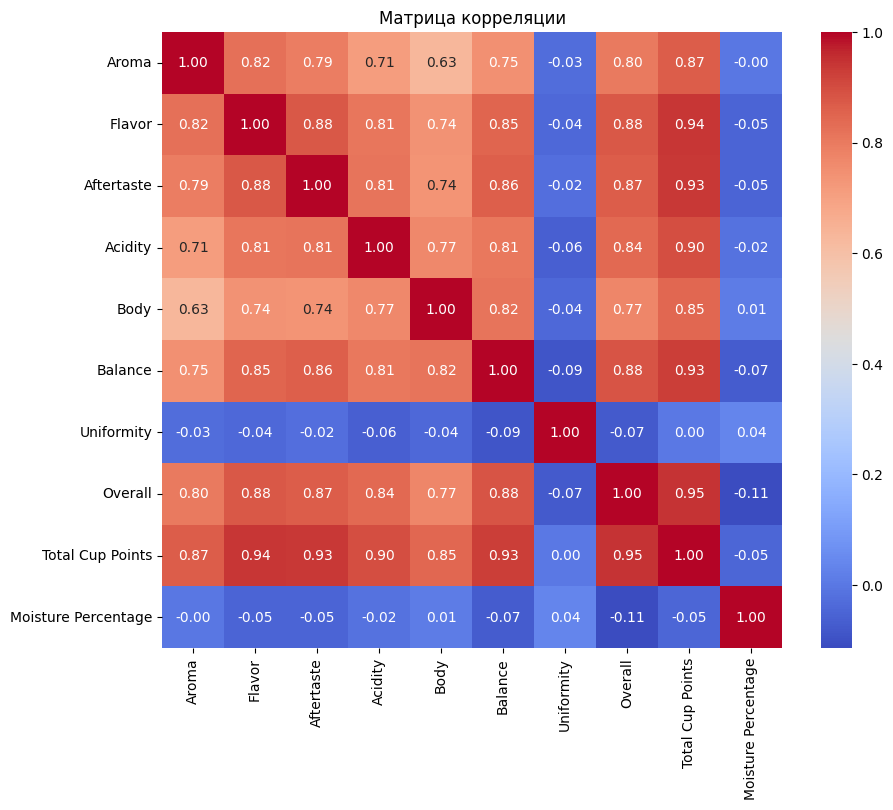

In [10]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Матрица корреляции")
plt.show()

# Построение матрицы ковариации

In [11]:
cov = df.cov()
cov.style.background_gradient(cmap='Reds')

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage
Aroma,0.082729,0.066171,0.062963,0.053214,0.042519,0.054968,-0.000834,0.070649,0.432473,-0.000868
Flavor,0.066171,0.078183,0.067644,0.058843,0.048305,0.061043,-0.001149,0.075198,0.454392,-0.017755
Aftertaste,0.062963,0.067644,0.076127,0.058315,0.047589,0.060953,-0.000682,0.073168,0.446318,-0.017593
Acidity,0.053214,0.058843,0.058315,0.067346,0.046367,0.053558,-0.001677,0.066829,0.402833,-0.005423
Body,0.042519,0.048305,0.047589,0.046367,0.054522,0.048840,-0.001059,0.055197,0.342319,0.002846
Balance,0.054968,0.061043,0.060953,0.053558,0.048840,0.065689,-0.002358,0.069448,0.412247,-0.023231
Uniformity,-0.000834,-0.001149,-0.000682,-0.001677,-0.001059,-0.002358,0.010672,-0.002361,0.000636,0.004541
Overall,0.070649,0.075198,0.073168,0.066829,0.055197,0.069448,-0.002361,0.093856,0.502147,-0.043382
Total Cup Points,0.432473,0.454392,0.446318,0.402833,0.342319,0.412247,0.000636,0.502147,2.994343,-0.100325
Moisture Percentage,-0.000868,-0.017755,-0.017593,-0.005423,0.002846,-0.023231,0.004541,-0.043382,-0.100325,1.556177


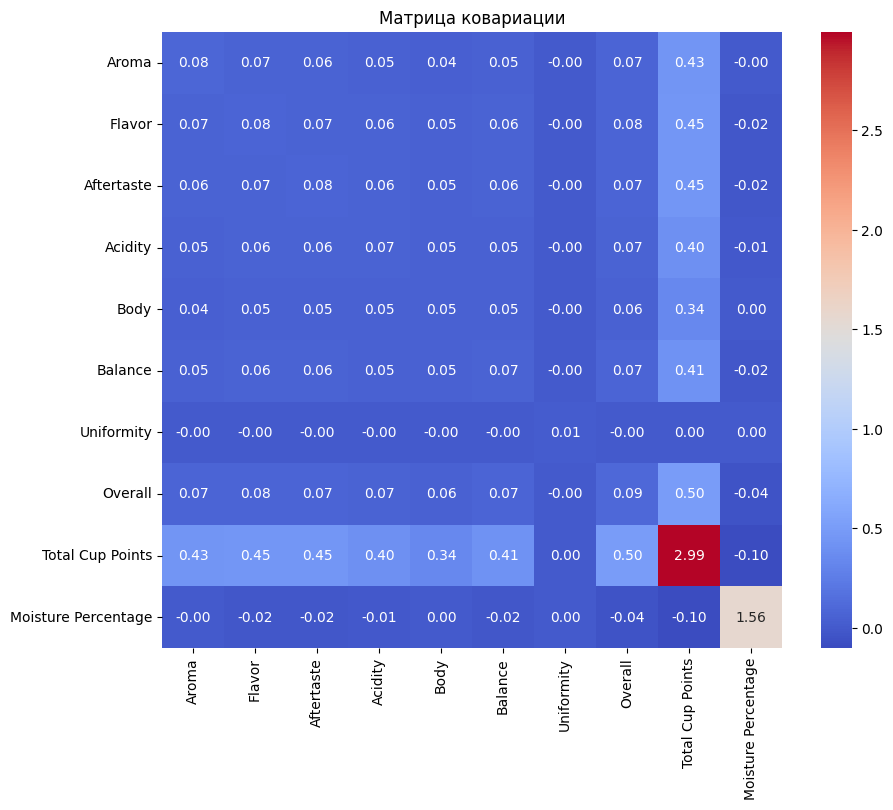

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(cov,annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Матрица ковариации')
plt.show()

# Создание вариационного ряда

Вариационный ряд - это упорядоченный список всех значений переменной из набора данных.

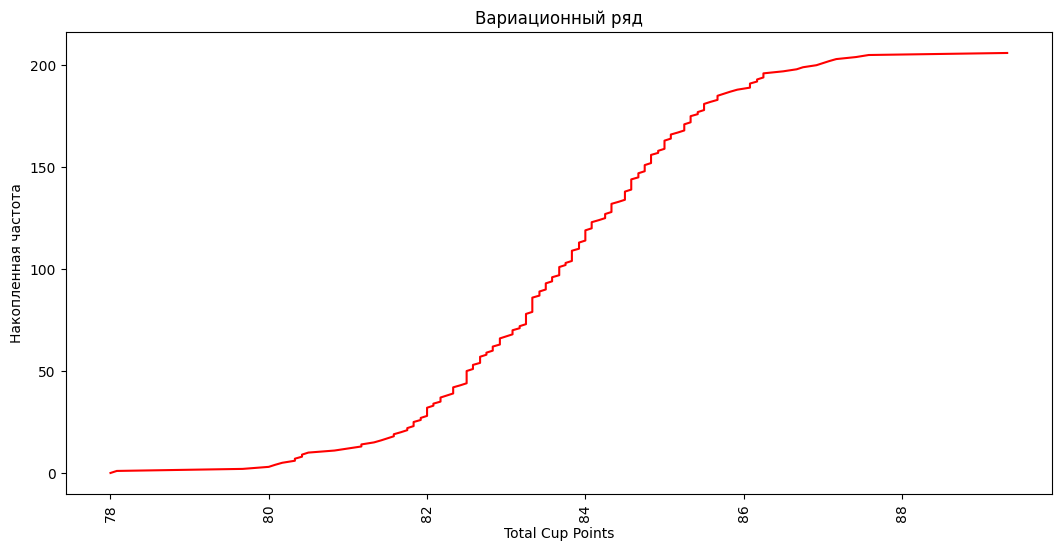

In [13]:
var_values = df.sort_values(by='Total Cup Points', ascending=True)['Total Cup Points']
plt.figure(figsize=(28,6))
plt.subplot(1, 2, 1)
plt.plot(var_values, [i for i in range(0, len(var_values))], color='red')
plt.title('Вариационный ряд')
plt.xlabel('Total Cup Points')
plt.ylabel('Накопленная частота')
plt.xticks(rotation=90)
plt.show()

# Создание гистограммы распределения

Гистограмма — это графическое представление распределения частот или вероятностей значений некоторой переменной. Судя по гистограмме, имеет место нормальное распределение.

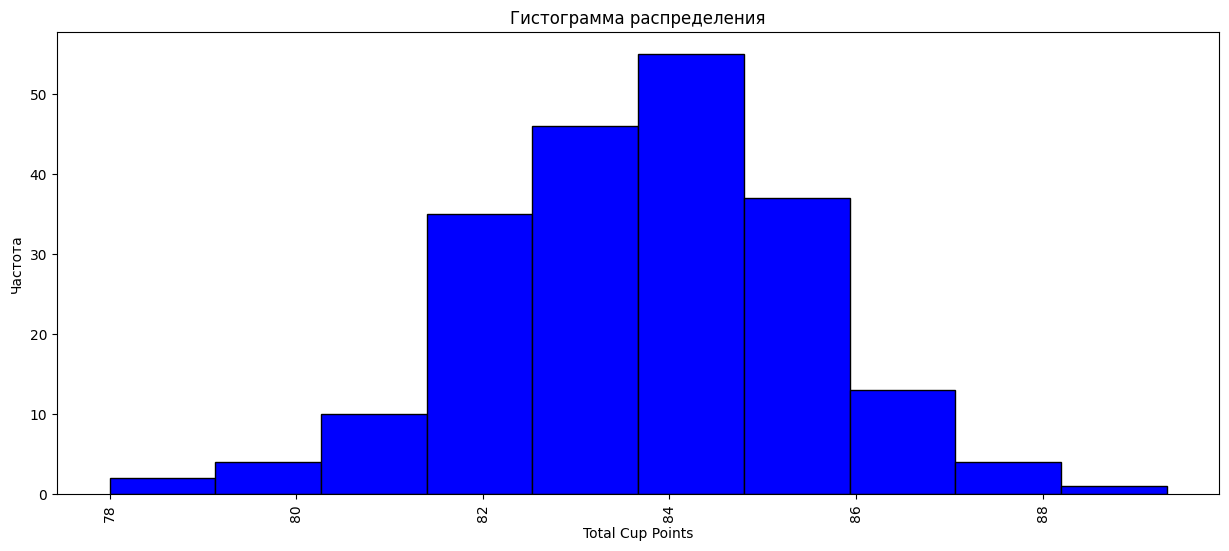

In [14]:
plt.figure(figsize=(15, 6))
plt.hist(df['Total Cup Points'], color = 'blue', edgecolor = 'black')
plt.title('Гистограмма распределения')
plt.xlabel('Total Cup Points')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.show()

# Вычисление среднего, медианы, моды и дисперсии



Среднее значение представляет собой сумму всех значений в выборке, делённую на количество этих значений. Оно является мерой центральной тенденции и характеризует "средний" уровень переменной. Среднее чувствительно к выбросам.

Медиана - это значение, которое разделяет упорядоченный набор данных на две равные части. Если у нас есть нечетное количество значений, то медиана - это среднее значение самого центрального числа. Если число значений четное, то медиана - это среднее арифметическое двух центральных чисел. Медиана менее чувствительна к выбросам, чем среднее.

Мода - это значение, которое встречается наиболее часто в наборе данных.

Дисперсия представляет собой среднюю квадратичную разницу между каждым значением в выборке и средним значением этой выборки. Она измеряет степень изменчивости или разброса данных. Большая дисперсия указывает на больший разброс значений относительно среднего, в то время как маленькая дисперсия свидетельствует о более сгруппированных данных.


In [15]:
points = pd.Series(df['Total Cup Points'])
average = statistics.mean(points)
print('Среднее значение = ', round(average,2))
median = np.median(points)
print('Медиана = ', median)
mode = statistics.mode(points)
print('Мода = ', mode)
variance = np.var(points)
print('Дисперсия = ', round(variance,2))

Среднее значение =  83.71
Медиана =  83.75
Мода =  83.33
Дисперсия =  2.98


Среднее значение очков за чашку - 83,71.
Медиана 83,75 - значение, которое разделяет набор данных на две равные части при упорядочении их по возрастанию.
Мода 83,33 - наиболее часто встречающееся значение.
Дисперсия 2,98. Это мера разброса данных относительно среднего значения. Дисперсия не слишком высокая, невысокий разброс значений.

# Создание датафрейма вариационного ряда

Вычислим оптимальное количество интервалов для построения гистограммы переменной "Total Cup Points" с использованием формулы Стёрджеса.

In [16]:
parameter = 'Total Cup Points'
min_value = df[parameter].min()
max_value = df[parameter].max()
k = (max_value-min_value) / (1+3.322*math.log10(df[parameter].count()))
print(f"Длина интервала {round(k,0)}")

Длина интервала 1.0


Создание и вывод интервалов, которые будут использоваться для построения гистограммы Total Cup Points

In [17]:
intervals = []
current_min = min_value
while current_min < max_value:
  current_max = current_min + k
  intervals.append((round(current_min, 2), round(current_max, 2)))
  current_min = current_max

intervals_df = pd.DataFrame(intervals, columns=['Interval Start', 'Interval End'])
intervals_df['Interval'] = list(zip(intervals_df['Interval Start'], intervals_df['Interval End']))
intervals_df['Interval'] = intervals_df['Interval'].apply(str)
print(intervals_df)

   Interval Start  Interval End        Interval
0           78.00         79.30    (78.0, 79.3)
1           79.30         80.61   (79.3, 80.61)
2           80.61         81.91  (80.61, 81.91)
3           81.91         83.21  (81.91, 83.21)
4           83.21         84.52  (83.21, 84.52)
5           84.52         85.82  (84.52, 85.82)
6           85.82         87.12  (85.82, 87.12)
7           87.12         88.43  (87.12, 88.43)
8           88.43         89.73  (88.43, 89.73)


In [18]:
intervals_df['Число значений в интервале'] = intervals_df.apply(lambda row: ((df[parameter] >= row['Interval Start']) & (df[parameter] < row['Interval End'])).sum(), axis=1)
intervals_df['Частость'] = intervals_df['Число значений в интервале'] / len(df)
intervals_df['Накопленная частота'] = intervals_df['Число значений в интервале'].cumsum()
intervals_df['Относительная совокупная частота'] = intervals_df['Накопленная частота'] / len(df)
print(intervals_df)

   Interval Start  Interval End        Interval  Число значений в интервале  \
0           78.00         79.30    (78.0, 79.3)                           2   
1           79.30         80.61   (79.3, 80.61)                           9   
2           80.61         81.91  (80.61, 81.91)                          15   
3           81.91         83.21  (81.91, 83.21)                          47   
4           83.21         84.52  (83.21, 84.52)                          66   
5           84.52         85.82  (84.52, 85.82)                          48   
6           85.82         87.12  (85.82, 87.12)                          16   
7           87.12         88.43  (87.12, 88.43)                           3   
8           88.43         89.73  (88.43, 89.73)                           1   

   Частость  Накопленная частота  Относительная совокупная частота  
0  0.009662                    2                          0.009662  
1  0.043478                   11                          0.053140  
2 

In [19]:
pd.DataFrame(intervals_df).drop(['Interval Start', 'Interval End'], axis=1)

,Interval,Число значений в интервале,Частость,Накопленная частота,Относительная совокупная частота
0,"(78.0, 79.3)",2,0.009662,2,0.009662
1,"(79.3, 80.61)",9,0.043478,11,0.053140
2,"(80.61, 81.91)",15,0.072464,26,0.125604
3,"(81.91, 83.21)",47,0.227053,73,0.352657
4,"(83.21, 84.52)",66,0.318841,139,0.671498
5,"(84.52, 85.82)",48,0.231884,187,0.903382
6,"(85.82, 87.12)",16,0.077295,203,0.980676
7,"(87.12, 88.43)",3,0.014493,206,0.995169
8,"(88.43, 89.73)",1,0.004831,207,1.000000


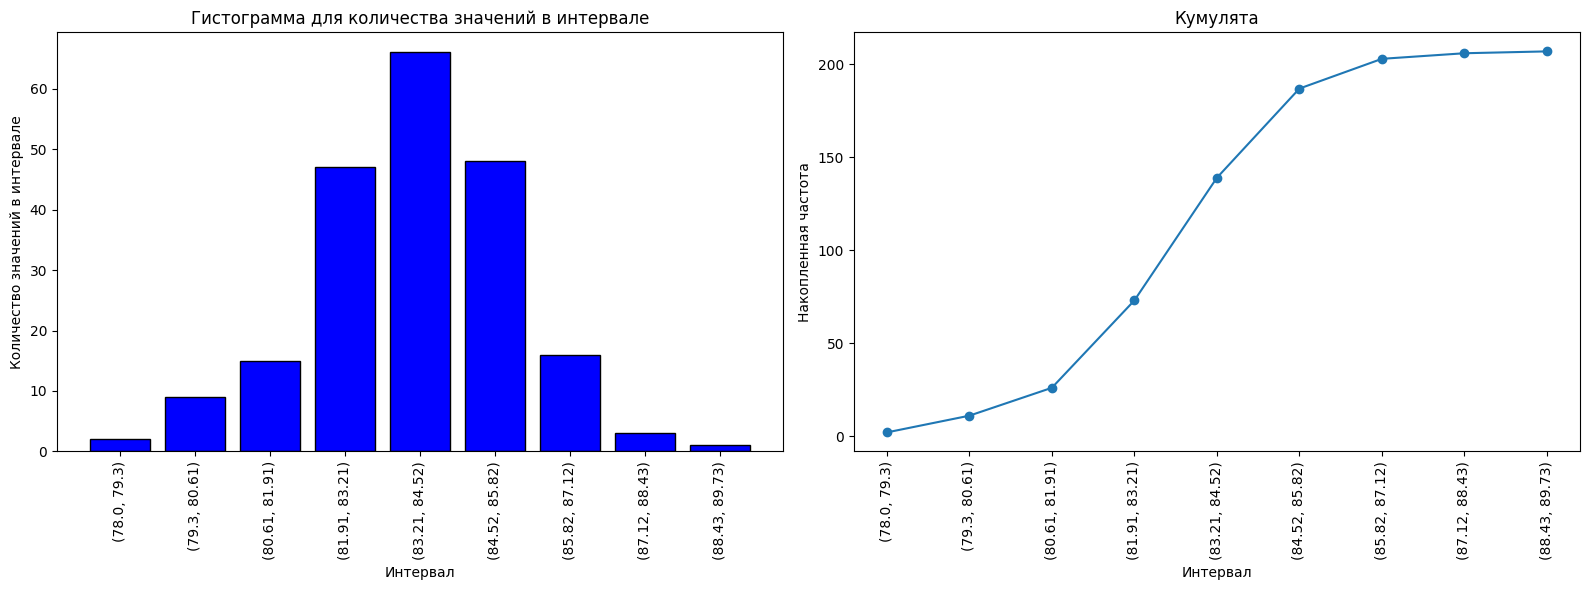

In [20]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.bar(intervals_df['Interval'], intervals_df['Число значений в интервале'], align='center', color='blue', edgecolor='black')
plt.title('Гистограмма для количества значений в интервале')
plt.xlabel('Интервал')
plt.ylabel('Количество значений в интервале')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.plot(intervals_df['Interval'], intervals_df['Накопленная частота'], marker = 'o', linestyle = '-')
plt.title('Кумулята')
plt.xlabel('Интервал')
plt.ylabel('Накопленная частота')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Эта гистограмма представляет собой визуализацию частотного распределения значений вариационного ряда "AveragePrice" в различных интервалах.

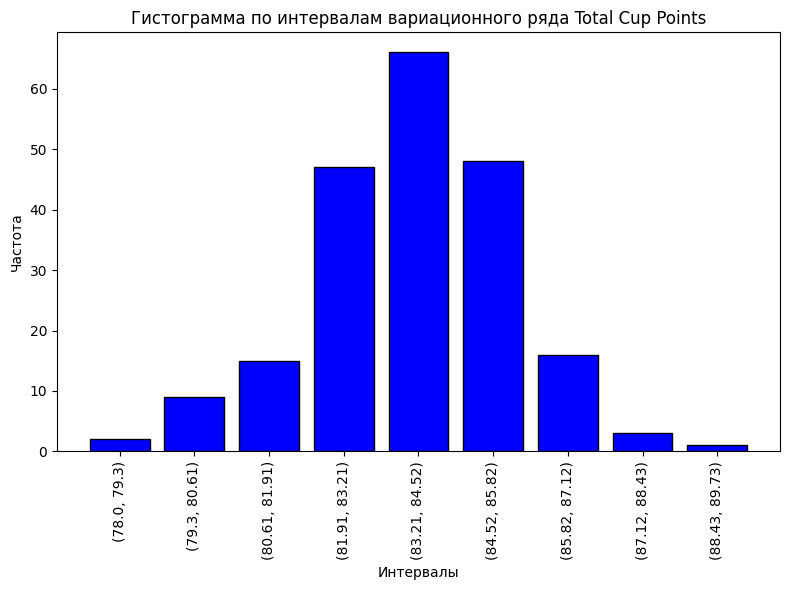

In [21]:
plt.figure(figsize=(8,6))
colors = ['blue'] * len(intervals_df['Число значений в интервале'])

plt.bar(intervals_df['Interval'], intervals_df['Число значений в интервале'], align='center', color=colors, edgecolor='black')
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.title('Гистограмма по интервалам вариационного ряда Total Cup Points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Характеристики вариационного ряда

Дисперсия, вариационный размах, среднее линейное отклонение вариационного ряда

In [22]:
def calculate_variance(data):
  mean_value = sum(data) / len(data)
  deviations = [x - mean_value for x in data]
  squared_deviations = [x**2 for x in deviations]
  variance = sum(squared_deviations) / len(data)
  return variance

result_variance = calculate_variance(df[parameter])
print(f'Дисперсия: {round(result_variance,2)} ')

def calculate_range(data):
  return data.max()-data.min()

result_range = calculate_range(df[parameter])
print(f"Вариационный размах: {round(result_range, 2)}")

def mean_absolute_deviation(data):
  mean = data.mean()
  absolute_deviations = abs(data - mean)
  mad = absolute_deviations.mean()
  return mad

mad_result = mean_absolute_deviation(df[parameter])
print(f'Среднее линейное отклонение: {round(mad_result,2)}')


Дисперсия: 2.98 
Вариационный размах: 11.33
Среднее линейное отклонение: 1.35


Дисперсия 2.98 указывает на небольшой разброс значений.

Вариационный размах указывает на разброс значений переменной 'Total Cup Points' на протяжении 11 единиц.

Среднее линейное отклонение показывает, что в среднем значения переменной 'Total Cup Points' отклоняются примерно на 1.35 единиц от их среднего значения.


# Оценки

Разбиение датасета на 10 частей

In [23]:
data = df[:-3]
num_subsets = 10
subset_size = len(data) // num_subsets
subsets = np.array_split(data[:num_subsets * subset_size], num_subsets)
for i, subset in enumerate(subsets, 1):
  count = subset['Total Cup Points'].count()
  print(f'Количество значений Total Cup Points в сабсете {i}: {count}')

Количество значений Total Cup Points в сабсете 1: 20
Количество значений Total Cup Points в сабсете 2: 20
Количество значений Total Cup Points в сабсете 3: 20
Количество значений Total Cup Points в сабсете 4: 20
Количество значений Total Cup Points в сабсете 5: 20
Количество значений Total Cup Points в сабсете 6: 20
Количество значений Total Cup Points в сабсете 7: 20
Количество значений Total Cup Points в сабсете 8: 20
Количество значений Total Cup Points в сабсете 9: 20
Количество значений Total Cup Points в сабсете 10: 20


Расчет среднего значения для каждого поднабора

In [24]:
for i, subset in enumerate(subsets, 1):
  mean = subset['Total Cup Points'].mean()
  print(f'Среднее значение для Total Cup Points в сабсете {i}: {round(mean, 2)}')

Среднее значение для Total Cup Points в сабсете 1: 86.68
Среднее значение для Total Cup Points в сабсете 2: 85.43
Среднее значение для Total Cup Points в сабсете 3: 84.9
Среднее значение для Total Cup Points в сабсете 4: 84.48
Среднее значение для Total Cup Points в сабсете 5: 84.01
Среднее значение для Total Cup Points в сабсете 6: 83.62
Среднее значение для Total Cup Points в сабсете 7: 83.24
Среднее значение для Total Cup Points в сабсете 8: 82.7
Среднее значение для Total Cup Points в сабсете 9: 82.2
Среднее значение для Total Cup Points в сабсете 10: 81.29


Построение графиков оценок

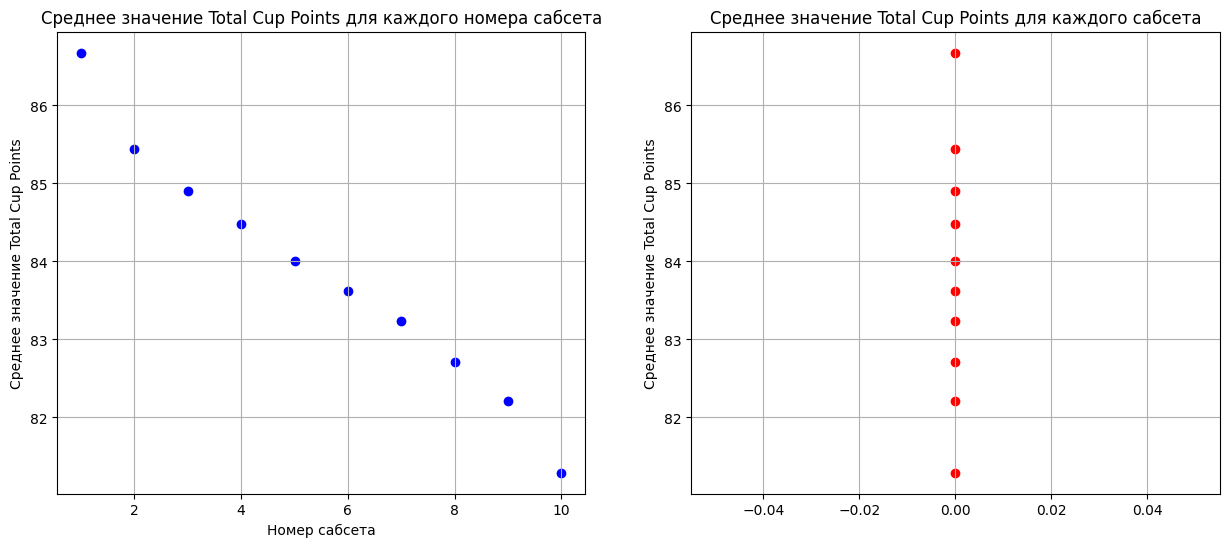

In [25]:
values = [subset['Total Cup Points'].mean() for subset in subsets]
subset_numbers = np.arange(1, len(values) + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(subset_numbers, values, color = 'blue')
plt.xlabel('Номер сабсета')
plt.ylabel('Среднее значение Total Cup Points')
plt.title('Среднее значение Total Cup Points для каждого номера сабсета')
plt.grid(True)

means = [subset['Total Cup Points'].mean() for subset in subsets]
x_values = np.zeros(len(means))
plt.subplot(1,2,2)
plt.scatter(x_values, means, color='red')
plt.xlabel('')
plt.ylabel('Среднее значение Total Cup Points')
plt.title('Среднее значение Total Cup Points для каждого сабсета')
plt.grid(True)
plt.show()

# Оценки по методу наименьших квадратов

In [26]:
from sklearn.linear_model import LinearRegression


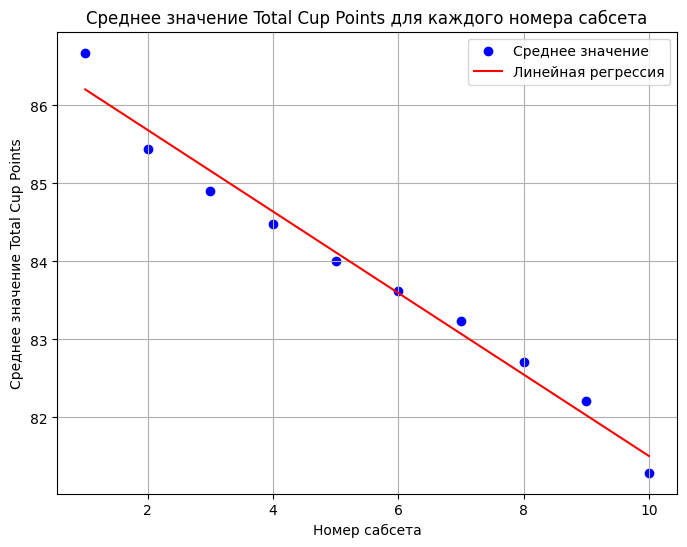

In [28]:
# создание списка values, в котором каждый элемент представляет собой среднее значение переменной "Total Cup Points"
# для каждого сабсета в списке subsets.
values = [subset['Total Cup Points'].mean() for subset in subsets]

# создание массива subset_numbers, представляющего собой номера сабсетов.
subset_numbers = np.arange(1, len(values) + 1)

# линейная регрессия, которая возвращает коэффициенты полинома заданной степени
coefficients = np.polyfit(subset_numbers, values, 1)
# создание объекта полинома с использованием коэффициентов, полученных при помощи линейной регрессии
polynomial = np.poly1d(coefficients)
# вычисляем значение полинома для каждого номера сабсета, создавая линию регрессии
regression_line = polynomial(subset_numbers)

# рисуем график
plt.figure(figsize=(8,6))
# строим точечный график, отображающий средние значения для каждого сабсета
plt.scatter(subset_numbers, values, color='blue', label='Среднее значение')
# строим линию регрессии, аппроксимирующую средние значения
plt.plot(subset_numbers, regression_line, color='red', label='Линейная регрессия')
plt.xlabel('Номер сабсета')
plt.ylabel('Среднее значение Total Cup Points')
plt.title('Среднее значение Total Cup Points для каждого номера сабсета')
plt.legend()
plt.grid(True)
plt.show()

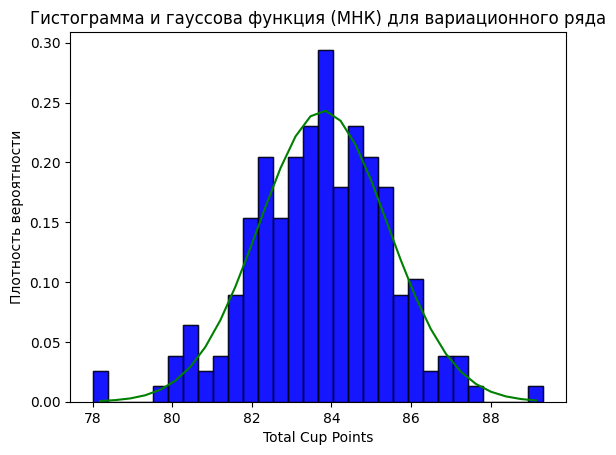

Оценка среднего (МНК): 83.79804851764506
Оценка стандартного отклонения (МНК): 1.6214472232948223
Оценка амплитулы (МНК): 0.24333482141986545


In [34]:
from scipy.optimize import curve_fit

values, bin_edges, _ = plt.hist(var_values, bins = 30, density = True, color = 'blue', edgecolor='black', alpha = .7, label ='Гистограмма')
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Определение функции гауссовой кривой
def gaussian_function(x, mu, sigma, A):
  return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Оценка параметров МНК для гауссовой функции
params_mnk, covariance_mnk = curve_fit(gaussian_function, bin_centers, values, p0 =[np.mean(var_values), np.std(var_values),1])

# Создание массива значений гауссовой функции
gaussian_fit = gaussian_function(bin_centers, *params_mnk)

# Гистограмма
plt.hist(var_values, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Гистограмма')

# Гауссова функция (МНК)
plt.plot(bin_centers, gaussian_fit, label = 'Гауссова функция (МНК)', color='green')

plt.title('Гистограмма и гауссова функция (МНК) для вариационного ряда')
plt.xlabel('Total Cup Points')
plt.ylabel('Плотность вероятности')
plt.legend
plt.show()

# Вывод параметров оценки
print(f'Оценка среднего (МНК): {params_mnk[0]}')
print(f'Оценка стандартного отклонения (МНК): {params_mnk[1]}')
print(f'Оценка амплитулы (МНК): {params_mnk[2]}')

# Оценки по методу максимизации функции правдоподобия

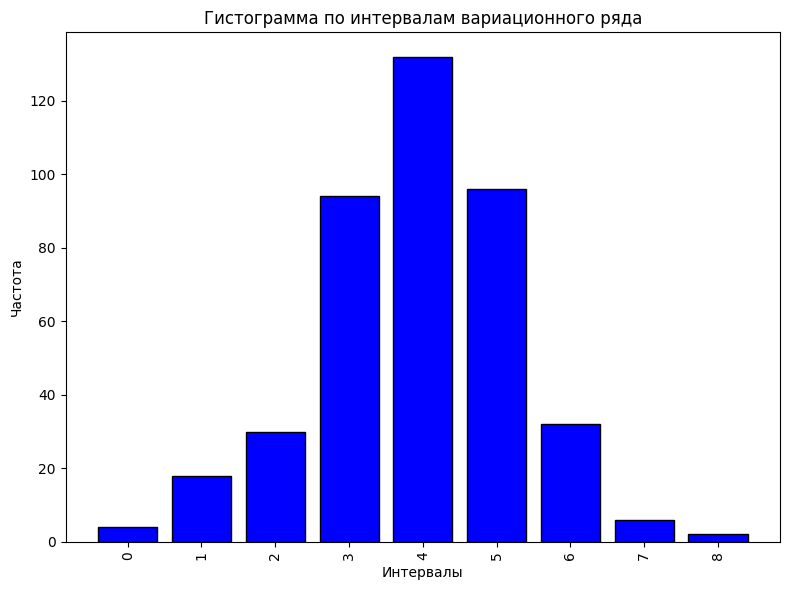

In [35]:
trimmed_counts = intervals_df['Число значений в интервале'] + intervals_df['Число значений в интервале']

plt.figure(figsize=(8,6))
plt.bar(trimmed_counts.index.astype(str), trimmed_counts.values, color='blue', edgecolor='black')
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.title('Гистограмма по интервалам вариационного ряда')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Строим гистограмму данных и PDF с использованием оцененных параметров ММП для нормального распределения, также выводим оценки среднего и стандартного отклонения

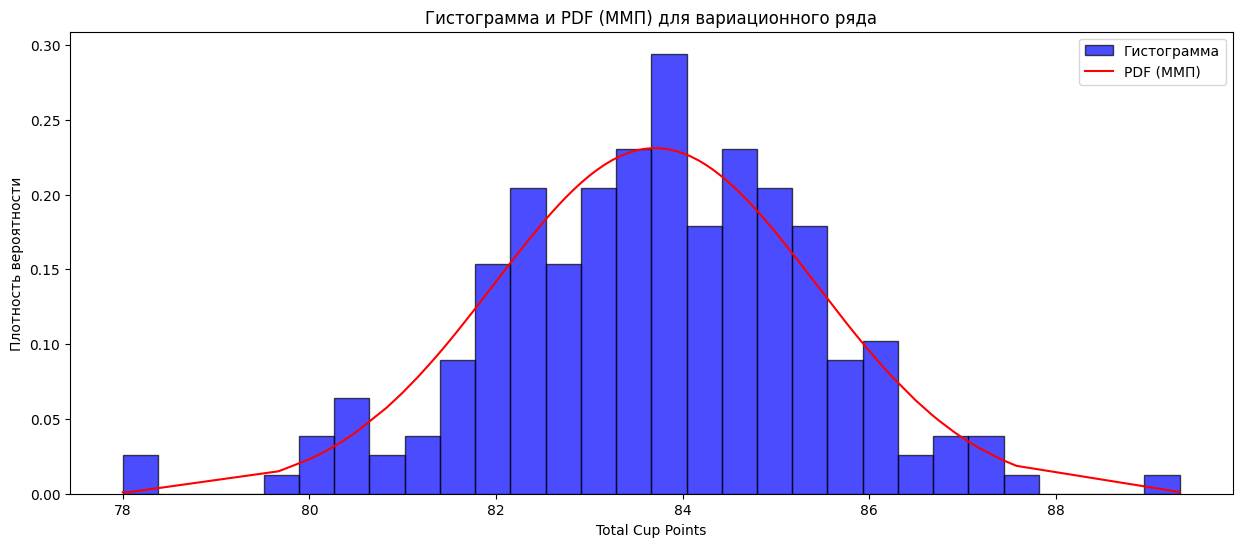

Оценка среднего (ММП): 83.70657004830917
Оценка стандартного отклонения (ММП): 1.7262321997379364


In [36]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# Оценка параметров ММП для нормального распределения
params_mle = norm.fit(var_values)

# Создание PDF с использованием оцененных параметров
pdf_mle = norm.pdf(var_values, *params_mle)

# Построение гистограммы
plt.figure(figsize=(15,6))
plt.hist(var_values, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Гистограмма')

# Построение PDF (MMП)
plt.plot(var_values, pdf_mle, label='PDF (ММП)', color='red')

plt.title('Гистограмма и PDF (ММП) для вариационного ряда')
plt.xlabel('Total Cup Points')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Параметры оценки
print(f'Оценка среднего (ММП): {params_mle[0]}')
print(f'Оценка стандартного отклонения (ММП): {params_mle[1]}')

